In [26]:
import pywt
import pywt.data
from scipy import stats

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [27]:
training_files = os.listdir("training_PCA")
testing_files = os.listdir("testing_PCA")
train_pca = []
test_pca = []
filenames = []
filenames_test = []
for dir in (training_files):
    temp_train = []
    for ind,file in enumerate(os.listdir(f"training_PCA/{dir}")):
        df = pd.read_csv(fr'training_PCA/{dir}/{file}')
        temp_train.append(df)
        if file.split('__')[0] not in filenames :
            filenames.append(file.split('__')[0])
    train_pca.append(temp_train)

for dir in (testing_files):
    temp_test = []
    for ind,file in enumerate(os.listdir(f"testing_PCA/{dir}")):
        df = pd.read_csv(f'testing_PCA/{dir}/{file}')
        temp_test.append(df)
        if file.split('__')[0] not in filenames_test :
            filenames_test.append(file.split('__')[0])
    test_pca.append(temp_test)
print(len(filenames))
len(filenames_test)

11


11

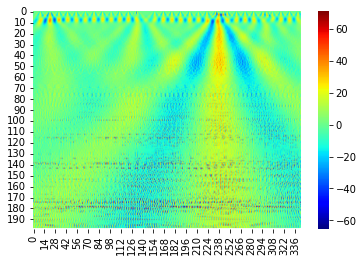

In [29]:
coef, freqs = pywt.cwt(test_pca[2][2]['0'], np.arange(1,200), wavelet='morl')
sns.heatmap(coef, cmap='jet', shading='gouraud')
plt.show()

In [6]:
max_file_len = 0
for activity in train_pca:
    for file in activity:
        if len(file) > max_file_len:
            max_file_len = len(file)

print(max_file_len)

365


In [30]:
opt_file_len = 360

In [31]:
scale = np.arange(1, 200)

(199, 336)


<AxesSubplot:>

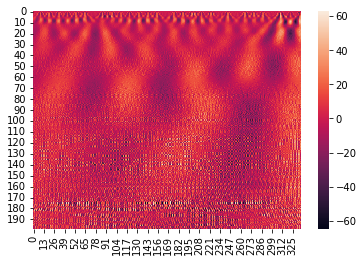

In [32]:
file = pd.read_csv('training_PCA/nothing/nothing__1.csv')
nothing, freqs = pywt.cwt(file['0'], scale, wavelet='morl')
print(nothing.shape)
for i in range(1, 5):
    coef, freqs = pywt.cwt(file[str(i)], scale, wavelet='morl')
    nothing += coef

sns.heatmap(nothing)

In [10]:
train_vectors_activities = []
for activity in train_pca:
    vectors_one_activity = []
    for file in activity:
        # file reshaping

        coef, freqs = pywt.cwt(file['0'], scale, wavelet='morl')
        matrix = coef
        for col in map(str, range(1, 5)):
            coef, freqs = pywt.cwt(file[col], scale, wavelet='morl')
            matrix += coef

        # now matrix is just a sum of all coefs
        if matrix.shape[1] < opt_file_len:
            to_add = opt_file_len - matrix.shape[1]
            matrix = np.concatenate((matrix, nothing[:,0:to_add]), axis=1,dtype=object)
        else:
            to_remove = matrix.shape[1] - opt_file_len
            print(to_remove)
            matrix = np.delete(matrix, np.s_[matrix.shape[1]-to_remove::], axis=1)

        print(matrix.shape)
        vector = matrix.flatten()
        vectors_one_activity.append(vector)

    train_vectors_activities.append(vectors_one_activity)
    print('activity done')
train_vectors_activities = np.array(train_vectors_activities,dtype=object)
print(train_vectors_activities.shape)

(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
0
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
5
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
activity done
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(199, 360)
(19

In [33]:
test_vectors_activities = []
for activity in test_pca:
    vectors_one_activity = []
    for file in activity:
        # file reshaping

        coef, freqs = pywt.cwt(file['0'], scale, wavelet='morl')
        matrix = coef
        for col in map(str, range(1, 5)):
            coef, freqs = pywt.cwt(file[col], scale, wavelet='morl')
            matrix += coef

        # now matrix is just a sum of all coefs
        if matrix.shape[1] < opt_file_len:
            to_add = opt_file_len - matrix.shape[1]
            matrix = np.concatenate((matrix, nothing[:,0:to_add]), axis=1)
        else:
            to_remove = matrix.shape[1] - opt_file_len
            print(to_remove)
            matrix = np.delete(matrix, np.s_[matrix.shape[1]-to_remove::], axis=1)

        vector = matrix.flatten()
        vectors_one_activity.append(vector)

    test_vectors_activities.append(vectors_one_activity)
    print('activity done')
test_vectors_activities = np.array(test_vectors_activities,dtype=object)
print(len(test_vectors_activities))

activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
activity done
11


In [19]:
train_vectors_df = pd.DataFrame()
for ind, activity in enumerate(train_vectors_activities):
    activity_df = pd.DataFrame(activity)
    activity_df['label'] = filenames[ind]
    train_vectors_df = pd.concat([train_vectors_df, activity_df])

train_vectors_df = train_vectors_df.reset_index().drop(["index"], axis=1)

In [23]:
train_vectors_df

,0,1,2,3,4,5,6,7,8,9,...,71631,71632,71633,71634,71635,71636,71637,71638,71639,label
0,-0.067809,-0.762047,-0.416549,1.948780,-0.204773,-1.173839,0.891810,6.308520,-5.814393,-6.315438,...,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,-22.712777,10.467984,brushteeth
1,1.948881,0.089588,-1.481125,1.246552,-0.710476,-0.501820,5.934144,-3.905442,-5.526724,3.676435,...,16.002344,8.534853,-13.493778,14.220339,10.775161,-14.457247,-0.300201,36.714152,-21.434704,brushteeth
2,0.608966,0.111772,-0.421240,1.382751,3.767596,-5.178909,-3.908713,4.963886,-0.009010,-0.895327,...,-0.438185,-7.412204,6.885995,1.840333,-1.365980,1.303971,-4.925619,-6.564344,16.002344,brushteeth
3,0.393348,5.717174,-6.658844,-4.901330,5.990080,0.902252,0.318163,-2.076030,0.654516,0.299967,...,1.033757,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,brushteeth
4,4.882826,-2.975979,-5.192090,4.430301,-0.966184,-1.624804,2.188635,1.718568,-1.537346,-0.924258,...,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,brushteeth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.354850,5.182399,-5.283611,-5.884059,5.669845,0.900192,-1.430650,-0.033996,2.168475,-0.272175,...,10.775161,-14.457247,-0.300201,36.714152,-21.434704,1.033757,30.331619,-22.185490,6.437911,washingdishes
625,-0.102379,-0.501262,0.989186,0.733201,-2.129133,-0.595606,2.682647,6.106321,-7.347481,-5.927908,...,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,washingdishes
626,0.438779,0.291876,-0.399282,-0.438077,-0.283263,1.786172,-0.855093,-1.535304,1.708284,6.457285,...,1.033757,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,washingdishes
627,-0.274897,0.614944,0.964166,-0.100663,0.799849,-0.915927,-1.652198,7.660341,-4.281876,-7.224406,...,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,-22.712777,washingdishes


In [34]:
len(filenames_test)

11

In [35]:
test_vectors_df = pd.DataFrame()
for ind, activity in enumerate(test_vectors_activities):

    activity_df = pd.DataFrame(activity)
    activity_df['label'] = filenames_test[ind]
    test_vectors_df = pd.concat([test_vectors_df, activity_df])

test_vectors_df = test_vectors_df.reset_index().drop(["index"], axis=1)

In [36]:
test_vectors_df

,0,1,2,3,4,5,6,7,8,9,...,71631,71632,71633,71634,71635,71636,71637,71638,71639,label
0,0.500560,2.042234,-0.683245,-1.861128,-0.276811,5.894530,-4.573988,-5.499111,5.062628,1.005403,...,-8.330282,22.371421,-8.633193,2.614822,5.448048,-3.144809,8.171989,2.278302,-8.991496,brushteeth
1,0.643649,-0.295176,-0.336119,1.561823,-0.239892,-0.624344,5.763033,-4.356357,-6.128288,4.691753,...,-19.147186,4.396462,5.857947,-16.061605,2.324723,6.834325,-4.829285,-19.891230,14.635877,brushteeth
2,-0.657838,1.429356,-0.097346,-1.709545,2.169270,-0.802036,-1.598768,1.379972,6.317248,-6.194265,...,-14.457247,-0.300201,36.714152,-21.434704,1.033757,30.331619,-22.185490,6.437911,24.663651,brushteeth
3,0.618285,1.256593,0.015521,1.256918,4.557412,-8.134831,-5.118843,6.982020,0.348970,-0.263611,...,1.033757,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,brushteeth
4,1.529639,1.309762,-2.402831,0.921179,0.288996,5.644719,-5.679211,-6.757829,6.137587,0.212079,...,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,-22.712777,brushteeth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.088790,0.550510,5.826408,-5.255708,-5.747785,3.242717,2.016320,8.415044,-7.655692,-6.365683,...,-0.300201,36.714152,-21.434704,1.033757,30.331619,-22.185490,6.437911,24.663651,-16.041805,washingdishes
149,0.135863,1.527756,-0.464990,1.015993,6.663202,-7.632777,-6.619300,7.239605,-1.498852,-0.926963,...,15.875364,-3.366091,-3.125773,9.086895,8.112893,-4.813356,-3.566037,16.244801,-1.792880,washingdishes
150,0.891223,0.635882,0.549134,-0.447213,-1.946594,1.290435,-0.423329,2.939634,-1.077305,-3.632372,...,4.307329,-36.688645,18.899124,5.048667,-33.470864,23.242556,2.588803,-35.752156,21.183962,washingdishes
151,5.006921,-4.160723,-5.478958,4.439456,0.608932,0.560813,-0.735392,-0.853024,1.868195,-0.422389,...,-8.330282,22.371421,-8.633193,2.614822,5.448048,-3.144809,8.171989,2.278302,-8.991496,washingdishes


In [27]:
train_vectors_df.to_csv('Vectors/train_vectors.csv', index=False)
print('train vectors saved to folder')
test_vectors_df.to_csv('Vectors/test_vectors.csv', index=False)
print('test vectors saved to folder')

train vectors saved to folder
test vectors saved to folder


In [37]:
test_vectors_df.to_csv('Vectors/test_vectors.csv', index=False)
print('test vectors saved to folder')

test vectors saved to folder


In [29]:
test_vectors_df.to_csv('Vectors/test_vectors.csv', index=False)
print('test vectors saved to folder')


test vectors saved to folder
